In [1]:
# Goal: have all the pictures be cut at the right part to make sure whole fish is in image

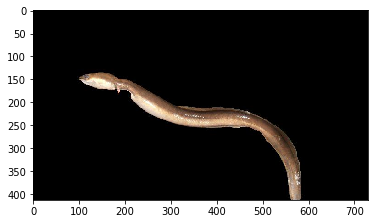

In [42]:
import cv2
from matplotlib import pyplot as plt

species = "aal"
num = 1

# Load the image
image = cv2.imread(f'sam_dataset/images/{species}/sam_{species}{num}.jpg')

# Convert BGR to RGB (OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
# plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### 1. Remove the black space around
Remove the black space around the fish by checking whole array being 0 (or other threshold) and then selecting the subset

In [119]:
import numpy as np

def get_shape(image, padding=10):
    image = np.sum(image, axis=2)
    x,y = image.shape
    
    x_s = 0
    x_e = x
    y_s = 0
    y_e = y
    # Loop cursor over image and set obj to true if found
    obj = False
    
    # Loop over the rows (horizontal bar)
    for i in range(x):
        if not obj:
            # We have not found the image yet
            if sum(image[i].flatten()) == 0:
                continue
            else:
                obj = True
                x_s = i
        else:
            # Now we are currently in the object itself
            if sum(image[i].flatten()) == 0:
                x_e = i
                break

                
    # Set obj to false for next loop
    obj = False
                
    # Loop over the cols (bar)
    image = image.T
    
    for i in range(y):
        if not obj:
            # We have not found the image yet
            if sum(image[i].flatten()) == 0:
                continue
            else:
                obj = True
                y_s = i
        else:
            # Now we are currently in the object itself
            if sum(image[i].flatten()) == 0:
                y_e = i
                break        
#     print(x_s,x_e,y_s,y_e)
                
    # Set final values
    x_s = x_s - 10 if x_s-10 >= 0 else 0
    y_s = y_s - 10 if y_s-10 >= 0 else 0
    
    x_e = x_e + 10 if x_e+10 <= x else x
    y_e = y_e + 10 if y_e+10 <= y else y

                
    # Loop over the columns
    return x_s, x_e, y_s, y_e

x1, x2, y1, y2 = get_shape(image)

In [54]:
new_img = image[x1:x2,y1:y2,0:3]

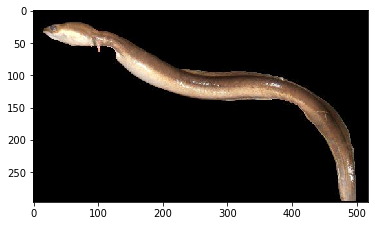

In [55]:
# Display the image
plt.imshow(new_img)
# plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### Add Padding and do Shrinkage
First make sure that the image is square again by adding padding

In [111]:
def add_padding(img, final_dim=(224,224)):
    x,y,_ = img.shape
    x_fill = False if x > y else True

    if x_fill:
        # Now fill up the x direction (rows)
        to_fill = y-x
        # create the padding (on both sides to have the image in the middle)
        f1 = to_fill // 2
        f2 = to_fill - f1

        filling_1 = np.zeros((f1,y,3))
        filling_2 = np.zeros((f2,y,3))
        corr_img = np.vstack((filling_1,img,filling_2))
    else:
        to_fill = x-y
        f1 = to_fill // 2
        f2 = to_fill - f1

        filling_1 = np.zeros((x,f1,3))
        filling_2 = np.zeros((x,f2,3))
        corr_img = np.hstack((filling_1,img,filling_2))
    corr_img = corr_img.astype('uint8')
    im = Image.fromarray(corr_img)
    return im.resize(final_dim)

# corr_img = add_padding(new_img.transpose(1, 0, 2))
corr_img = add_padding(new_img)

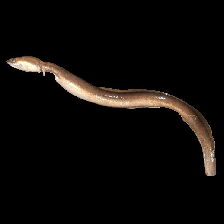

In [113]:
corr_img

### Run All

In [117]:
def load_image(species, file_name):
    image = cv2.imread(f'sam_dataset/images/{species}/{file_name}')
    # Convert BGR to RGB (OpenCV loads images in BGR format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [122]:
import os
from tqdm import tqdm
import shutil

all_species = [x for x in os.listdir("sam_dataset/images") if x not in ['.ipynb_checkpoints']]

for species in tqdm(all_species):
    try:
        os.mkdir(f'fitted_images/{species}')
    except:
        shutil.rmtree(f'fitted_images/{species}')
        os.mkdir(f'fitted_images/{species}')
    species_files = [x for x in os.listdir(os.path.join("sam_dataset/images", species)) if x not in ['.ipynb_checkpoints']]
    for species_file in species_files:
        img = load_image(species,species_file)
        x1, x2, y1, y2 = get_shape(img)
        new_img = img[x1:x2,y1:y2,0:3]
        corr_img = add_padding(new_img)
        corr_img.save(f"fitted_images/{species}/{species_file}")

100%|██████████| 62/62 [04:19<00:00,  4.18s/it]
